## Store Sales Forecasting

Business Goal: Help store managers forecast future sales to optimize inventory and staffing.

ML Goal: Predict weekly sales for each item at each store using past data and external variables.

In [1]:
# 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
features = pd.read_csv('features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores = pd.read_csv('stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
test = pd.read_csv('test.csv')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
df = train.merge(stores, on = 'Store')
df = df.merge(features, on = ['Store', 'Date'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


#### Data Cleaning and Processing

In [7]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

- About 50% of the data for Markdown(1-5) is missing so we can drop these columns

In [8]:
df.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday_y'], inplace = True)
df.rename(columns = {'IsHoliday_x' : 'IsHoliday'}, inplace = True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week
df['Day of Week'] = df['Date'].dt.day_of_week
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week,Day of Week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2,2010,5,4
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,2,2010,5,4
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,2,2010,5,4
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,2,2010,5,4
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,2,2010,5,4


In [11]:
df['Temperature'].describe()

count    421570.000000
mean         60.090059
std          18.447931
min          -2.060000
25%          46.680000
50%          62.090000
75%          74.280000
max         100.140000
Name: Temperature, dtype: float64

In [12]:
df['Fuel_Price'].describe()

count    421570.000000
mean          3.361027
std           0.458515
min           2.472000
25%           2.933000
50%           3.452000
75%           3.738000
max           4.468000
Name: Fuel_Price, dtype: float64

In [13]:
df['Size'].describe()

count    421570.000000
mean     136727.915739
std       60980.583328
min       34875.000000
25%       93638.000000
50%      140167.000000
75%      202505.000000
max      219622.000000
Name: Size, dtype: float64

#### EDA

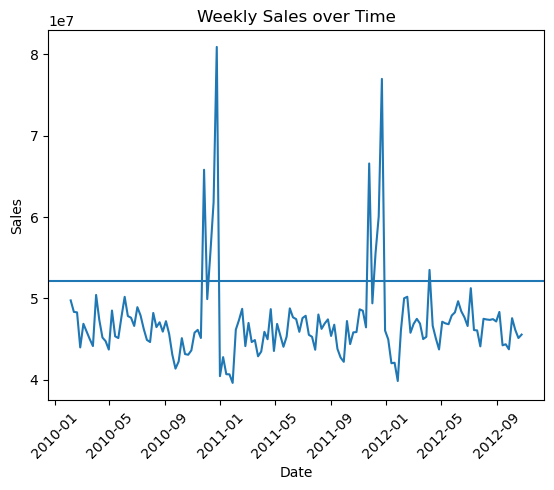

In [14]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
q1, q3 = np.percentile(weekly_sales['Weekly_Sales'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'])
plt.axhline(y = upper_bound, linestyle = '-')
plt.title('Weekly Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation = 45)

plt.show()

- We observe two sharp spikes in sales occurring around late Q4 in both 2010 and 2011. These likely correspond to major seasonal shopping events such as Black Friday and Christmas, during which retailers often experience a surge in demand due to promotional campaigns and holiday shopping.

In [15]:
spike_weeks = weekly_sales[weekly_sales['Weekly_Sales'] > upper_bound]
df[df['Date'].isin(spike_weeks['Date'])][['Date', 'IsHoliday']].drop_duplicates()

,Date,IsHoliday
3014,2010-11-26,True
3157,2010-12-10,False
3228,2010-12-17,False
3300,2010-12-24,False
6731,2011-11-25,True
6877,2011-12-09,False
6950,2011-12-16,False
7022,2011-12-23,False
8102,2012-04-06,False


- 2010-11-26 and 2011-11-25 are Black Fridays which are holidays
- 2012-04-06 is probably showing a spike because of store specific promotion 
- Other are Fridays just before Christmas explaining the sudden spike in the sales

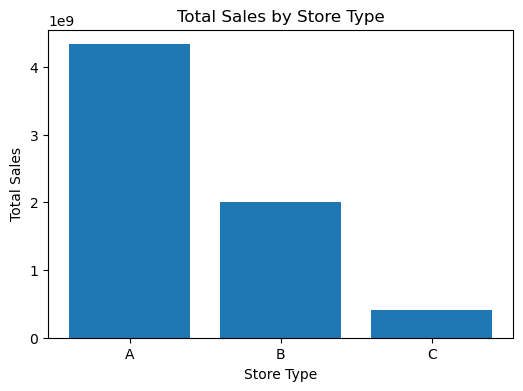

In [16]:
store_by_sales = df.groupby('Type')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize = (6, 4))
plt.bar(store_by_sales['Type'], store_by_sales['Weekly_Sales'] )
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.show()

- Type A stores have the highest sales followed by B and then C
- This may indicate larger size or better location 

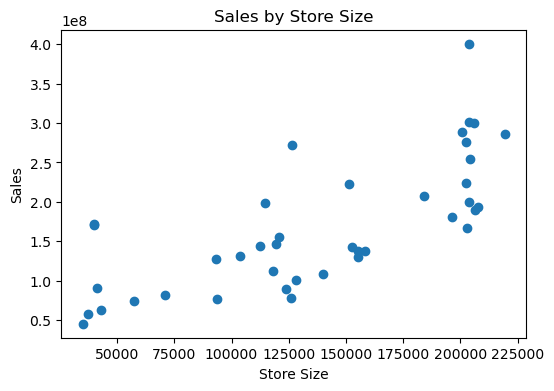

In [17]:
sales_by_size = df.groupby('Size')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize = (6, 4))
plt.scatter(sales_by_size['Size'], sales_by_size['Weekly_Sales'])
plt.title('Sales by Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.show()

- Larger Stores have higher total sales
- There are few expcetions where large stores underperform and medium size stores have strong sales
- Store size is a strong indicator for Total Sales

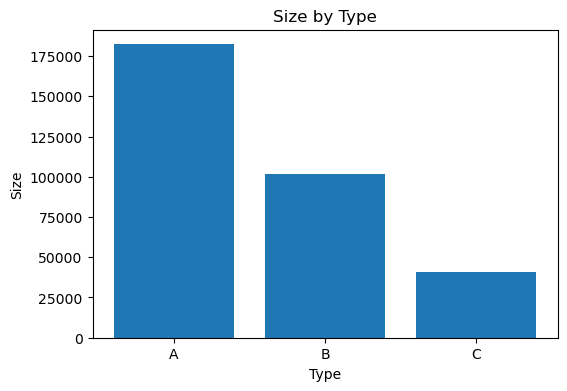

In [18]:
type_by_size = df.groupby('Type')['Size'].mean().reset_index()

plt.figure(figsize = (6, 4))
plt.bar(type_by_size['Type'], type_by_size['Size'] )
plt.title('Size by Type')
plt.xlabel('Type')
plt.ylabel('Size')
plt.show()

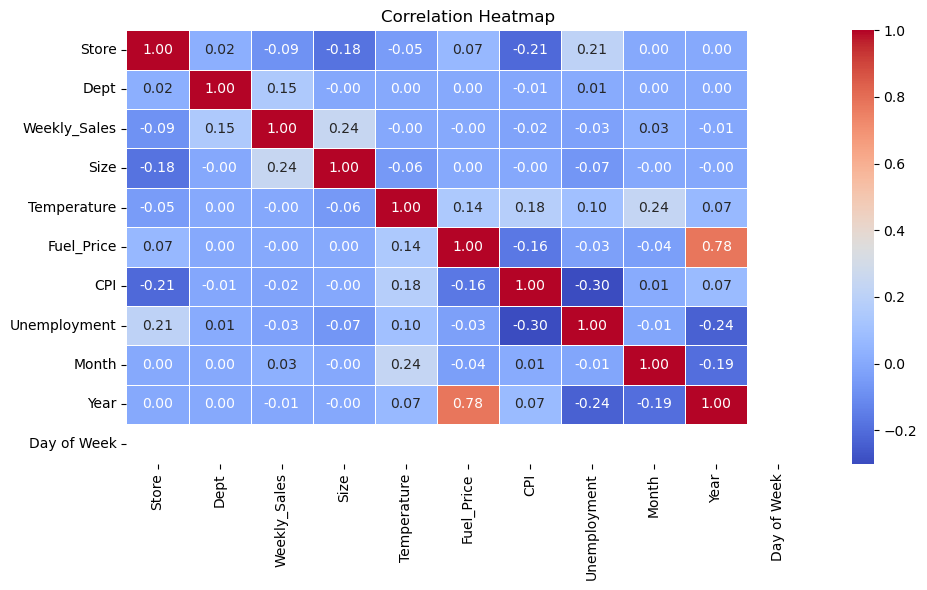

In [19]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

- A correlation heatmap of numeric features reveals that Weekly_Sales has a weak positive correlation with Size (0.24) and Dept (0.15), indicating that larger stores and some departments generally contribute to higher sales. Other variables such as Temperature, Fuel_Price, and Unemployment show negligible correlation with sales.

- Fuel_Price and Year have a high positive correlation (0.78), reflecting the inflationary trend over time. A moderate negative correlation exists between CPI and Unemployment (-0.30), consistent with macroeconomic behavior.

### Feature Engineering

In [20]:
holiday_dates = df[df['IsHoliday'] == True]['Date'].unique()
def days_to_next_holiday(date, holiday_dates):
    future_holiday = holiday_dates[holiday_dates > date]
    if len(future_holiday) == 0:
        return 30
    return (future_holiday[0] - date).days

df['Days_to_Next_Holiday'] = df['Date'].apply(lambda x: days_to_next_holiday(x, holiday_dates))
'''
def day_since_last_holiday(date, holiday_dates):
    past_holiday = holiday_dates[holiday_dates <= date]
    if len(past_holiday) == 0:
        return 30
    return (date - past_holiday[0]).days

df['Days_since_Last_Holiday'] = df['Date'].apply(lambda x: day_since_last_holiday(x, holiday_dates))
'''

"\ndef day_since_last_holiday(date, holiday_dates):\n    past_holiday = holiday_dates[holiday_dates <= date]\n    if len(past_holiday) == 0:\n        return 30\n    return (date - past_holiday[0]).days\n\ndf['Days_since_Last_Holiday'] = df['Date'].apply(lambda x: day_since_last_holiday(x, holiday_dates))\n"

In [21]:

holiday_mapping = {
    '2010-02-12': 'Super Bowl',
    '2010-09-10': 'Labor Day',
    '2010-11-26': 'Thanksgiving',
    '2010-12-31': 'Christmas',
    '2011-02-11': 'Super Bowl',
    '2011-09-09': 'Labor Day',
    '2011-11-25': 'Thanksgiving',
    '2011-12-30': 'Christmas',
    '2012-02-10': 'Super Bowl',
    '2012-09-07': 'Labor Day',
    '2012-11-23': 'Thanksgiving',
    '2012-12-28': 'Christmas'
}
df['Holiday_Type'] = df['Date'].astype(str).map(holiday_mapping)
df['Holiday_Type'] = df['Holiday_Type'].fillna('None')

df = pd.get_dummies(df, columns=['Holiday_Type'], prefix='Holiday')


In [22]:
df = df.sort_values(['Store', 'Dept', 'Date'])
df['Lag_1_Sales'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
df['Lag_2_Sales'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)
df['Lag_3_Sales'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(3)

for i in ['Lag_1_Sales', 'Lag_2_Sales', 'Lag_3_Sales']:
    df[i] = df[i].fillna(0)

In [23]:
store_df = df.groupby('Store').agg({
    'Weekly_Sales' : ['mean', 'std'],
    'Size' : 'first',
    'Temperature' : 'mean',
    'Fuel_Price' : 'mean',
    'CPI' : 'mean',
    'Unemployment' : 'mean'
})

store_df.columns = ['Sales_Mean', 'Sales_Std', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

### Clustering

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
store_scaled = scaler.fit_transform(store_df)

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 42)
store_df['Clusters'] = kmeans.fit_predict(store_scaled)

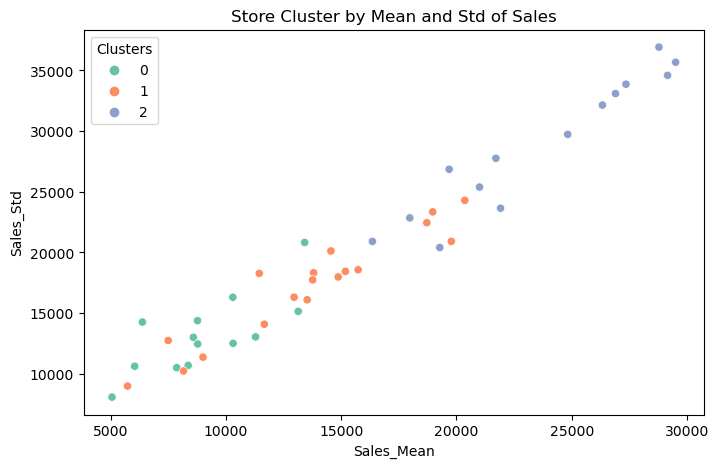

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize = (8, 5))
sns.scatterplot(data = store_df, x = 'Sales_Mean', y = 'Sales_Std', hue = 'Clusters', palette = 'Set2')
plt.title('Store Cluster by Mean and Std of Sales')
plt.show()

In [27]:
store_df.groupby('Clusters').mean()

,Sales_Mean,Sales_Std,Size,Temperature,Fuel_Price,CPI,Unemployment
Clusters,,,,,,,
0,9095.845212,13205.667793,73318.615385,62.316345,3.245516,205.309044,7.360473
1,13649.469053,17225.720834,122120.333333,57.805190,3.485865,135.893079,8.815218
2,23626.979038,28833.178825,193688.142857,62.664581,3.306787,186.194709,7.530669


K-Means clustering was applied to group stores into three segments based on their average sales, size, and economic factors. The resulting clusters represent small, medium, and large stores with varying sales volumes.

In [28]:
df = df.merge(store_df['Clusters'], on = 'Store')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,...,Days_to_Next_Holiday,Holiday_Christmas,Holiday_Labor Day,Holiday_None,Holiday_Super Bowl,Holiday_Thanksgiving,Lag_1_Sales,Lag_2_Sales,Lag_3_Sales,Clusters
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,...,7,0,0,1,0,0,0.00,0.00,0.00,2
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,...,210,0,0,0,1,0,24924.50,0.00,0.00,2
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,...,203,0,0,1,0,0,46039.49,24924.50,0.00,2
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,...,196,0,0,1,0,0,41595.55,46039.49,24924.50,2
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,...,189,0,0,1,0,0,19403.54,41595.55,46039.49,2


In [29]:
cutoff_date = df['Date'].quantile(0.8)
train_df = df[df['Date'] <= cutoff_date]
test_df = df[df['Date'] > cutoff_date]
X_train = train_df.drop(columns = ['Weekly_Sales', 'Date', 'Type'])
y_train = train_df['Weekly_Sales']
X_test = test_df.drop(columns = ['Weekly_Sales', 'Date', 'Type'])
y_test = test_df['Weekly_Sales']

### Modelling

In [30]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
print(dummy.score(X_test, y_test))

-0.00012316451725213895


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
'''
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}
model_reg = GridSearchCV(model, param_grid = params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)
model_reg.fit(X_train, y_train)
'''
model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
#model_reg.best_params_

In [33]:
#model_reg.score(X_test, y_test)

In [34]:
#y_pred = model_reg.predict(X_test)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred)

0.979940431836234

In [35]:
print('MSE is', mean_squared_error(y_test, y_pred))
print('MAE is', mean_absolute_error(y_test, y_pred))

MSE is 9679964.726119151
MAE is 1486.947784009803


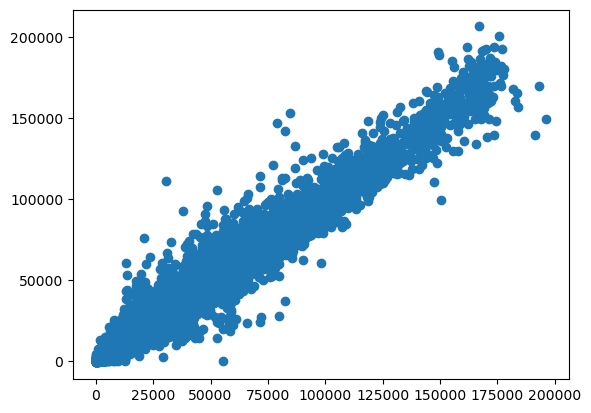

In [36]:
plt.scatter(y_pred, y_test)
plt.show()

In [37]:
weights = np.where(X_test['IsHoliday'] == True, 5, 1)
wmae = np.sum(weights * np.abs(y_test - y_pred)) / np.sum(weights)

print(f"WMAE: {wmae}")

WMAE: 1538.499786536918


In [38]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()

params = {
    'n_estimators': [200, 300],
    'learning_rate': [0.1, 0.05],
    'max_depth': [8, 10],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 2]
}

model_xgb_reg = GridSearchCV(model_xgb, param_grid = params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)
model_xgb_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arnav Pandita\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "C:\Users\Arnav Pandita\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py", line 1143, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs

In [39]:
model_xgb_reg.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 300,
 'reg_alpha': 0.1,
 'reg_lambda': 2,
 'subsample': 0.8}

In [40]:
y_pred = model_xgb_reg.predict(X_test)
print('r2 = ', r2_score(y_test, y_pred))
print('mae = ', mean_absolute_error(y_test, y_pred))
print('mse =', mean_squared_error(y_test, y_pred))

r2 =  0.983883223623695
mae =  1356.6828378758164
mse = 7777327.285798088


In [41]:
weights = np.where(X_test['IsHoliday'] == True, 5, 1)
wmae = np.sum(weights * np.abs(y_test - y_pred)) / np.sum(weights)

print(f"WMAE: {wmae}")

WMAE: 1414.7880392776915


In [42]:
'''
model_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_xgb.fit(X_train, y_train)
'''

'model_xgb = XGBRegressor(\n    n_estimators=300,\n    max_depth=10,\n    learning_rate=0.1,\n    subsample=0.8,\n    colsample_bytree=0.8,\n    random_state=42\n)\n\nmodel_xgb.fit(X_train, y_train)\n'

In [43]:
'''
y_pred = model_xgb.predict(X_test)
weights = np.where(X_test['IsHoliday'] == True, 5, 1)
wmae = np.sum(weights * np.abs(y_test - y_pred)) / np.sum(weights)

print(f"WMAE: {wmae}")

'''

'\ny_pred = model_xgb.predict(X_test)\nweights = np.where(X_test[\'IsHoliday\'] == True, 5, 1)\nwmae = np.sum(weights * np.abs(y_test - y_pred)) / np.sum(weights)\n\nprint(f"WMAE: {wmae}")\n\n'

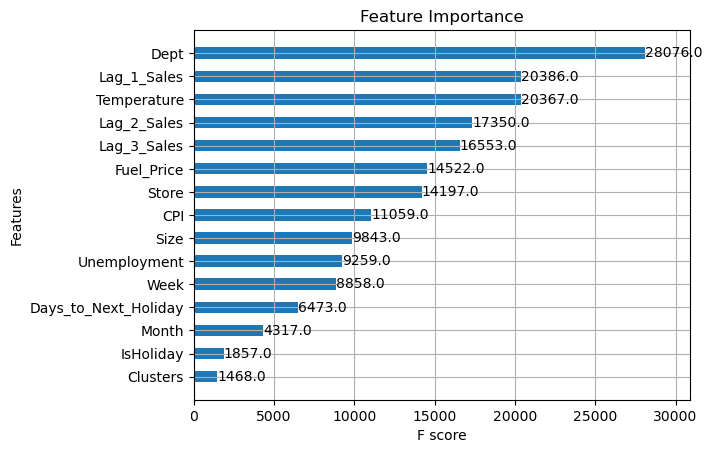

In [44]:
import xgboost as xgb
xgb.plot_importance(model_xgb_reg.best_estimator_, max_num_features = 15, height = 0.5)
plt.title('Feature Importance')
plt.show()

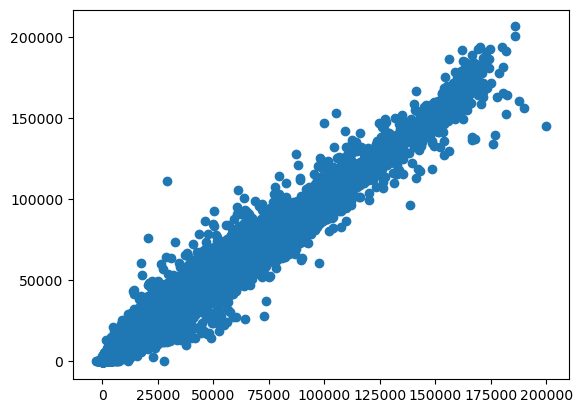

In [45]:
plt.scatter(y_pred, y_test)
plt.show()

In [60]:
df_test = test.merge(stores, on = 'Store')
df_test = df_test.merge(features, on = ['Store', 'Date'])
df_test.head()

,Store,Dept,Date,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False


In [61]:
df_test.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday_y'], inplace = True)
df_test.rename(columns = {'IsHoliday_x' : 'IsHoliday'}, inplace = True)
df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573


In [62]:
df_test['Date'] = pd.to_datetime(df['Date'])
df_test['Month'] = df['Date'].dt.month
df_test['Year'] = df['Date'].dt.year
df_test['Week'] = df['Date'].dt.isocalendar().week
df_test['Day of Week'] = df['Date'].dt.day_of_week
df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week,Day of Week
0,1,1,2010-02-05,False,A,151315,55.32,3.386,223.462779,6.573,2,2010,5,4
1,1,2,2010-02-12,False,A,151315,55.32,3.386,223.462779,6.573,2,2010,6,4
2,1,3,2010-02-19,False,A,151315,55.32,3.386,223.462779,6.573,2,2010,7,4
3,1,4,2010-02-26,False,A,151315,55.32,3.386,223.462779,6.573,2,2010,8,4
4,1,5,2010-03-05,False,A,151315,55.32,3.386,223.462779,6.573,3,2010,9,4


In [63]:
holiday_dates = df_test[df_test['IsHoliday'] == True]['Date'].unique()

df_test['Days_to_Next_Holiday'] = df_test['Date'].apply(lambda x: days_to_next_holiday(x, holiday_dates))
df_test['Holiday_Type'] = df_test['Date'].astype(str).map(holiday_mapping)
df_test['Holiday_Type'] = df_test['Holiday_Type'].fillna('None')

df_test = pd.get_dummies(df_test, columns=['Holiday_Type'], prefix='Holiday')

last_sales_df = df.groupby(['Store', 'Dept']).tail(3)
last_sales = last_sales_df.groupby(['Store', 'Dept'])['Weekly_Sales'].apply(list).to_dict()

def get_lag_sales(store, dept, lag_num):
    sales_list = last_sales.get((store, dept), [0, 0, 0])
    if len(sales_list) >= lag_num:
        return sales_list[-lag_num]
    else:
        return sales_list[0]

df_test['Lag_1_Sales'] = df_test.apply(lambda x: get_lag_sales(x['Store'], x['Dept'], 1), axis=1)
df_test['Lag_2_Sales'] = df_test.apply(lambda x: get_lag_sales(x['Store'], x['Dept'], 2), axis=1)
df_test['Lag_3_Sales'] = df_test.apply(lambda x: get_lag_sales(x['Store'], x['Dept'], 3), axis=1)

for i in ['Lag_1_Sales', 'Lag_2_Sales', 'Lag_3_Sales']:
    df_test[i] = df_test[i].fillna(0)

store_cluster_map = df[['Store', 'Clusters']].drop_duplicates().set_index('Store')['Clusters']
df_test['Clusters'] = df_test['Store'].map(store_cluster_map)
df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,...,Days_to_Next_Holiday,Holiday_Christmas,Holiday_Labor Day,Holiday_None,Holiday_Super Bowl,Holiday_Thanksgiving,Lag_1_Sales,Lag_2_Sales,Lag_3_Sales,Clusters
0,1,1,2010-02-05,False,A,151315,55.32,3.386,223.462779,6.573,...,490,0,0,1,0,0,27390.81,24185.27,22764.01,2
1,1,2,2010-02-12,False,A,151315,55.32,3.386,223.462779,6.573,...,483,0,0,0,1,0,43134.88,42354.72,42112.67,2
2,1,3,2010-02-19,False,A,151315,55.32,3.386,223.462779,6.573,...,476,0,0,1,0,0,9350.90,8548.87,10487.17,2
3,1,4,2010-02-26,False,A,151315,55.32,3.386,223.462779,6.573,...,469,0,0,1,0,0,36292.60,35549.19,35446.18,2
4,1,5,2010-03-05,False,A,151315,55.32,3.386,223.462779,6.573,...,462,0,0,1,0,0,25846.94,20413.83,20920.03,2


In [64]:
df_test.drop(columns = ['Type', 'Date'], inplace = True)

In [65]:
test['Weekly_Sales'] = model_xgb_reg.predict(df_test)

In [66]:
test.head()

,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,2012-11-02,False,36621.207031
1,1,1,2012-11-09,False,47153.894531
2,1,1,2012-11-16,False,9363.995117
3,1,1,2012-11-23,True,37389.480469
4,1,1,2012-11-30,False,27139.892578
